In [1]:
#import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


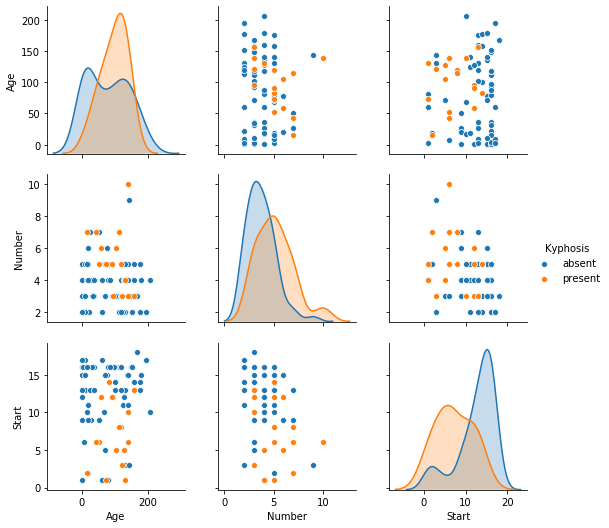

In [4]:
sns.pairplot(df,hue='Kyphosis')

In [6]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [7]:
#split the data in train and test sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
ypred=classifier.predict(xtest)

In [11]:
#evaluate
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(ytest,ypred)
print(cm)

[[13  3]
 [ 2  3]]


In [12]:
r=classification_report(ytest,ypred)
print(r)

              precision    recall  f1-score   support

      absent       0.87      0.81      0.84        16
     present       0.50      0.60      0.55         5

    accuracy                           0.76        21
   macro avg       0.68      0.71      0.69        21
weighted avg       0.78      0.76      0.77        21



In [13]:
#pydot---->conda install pydot

In [23]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

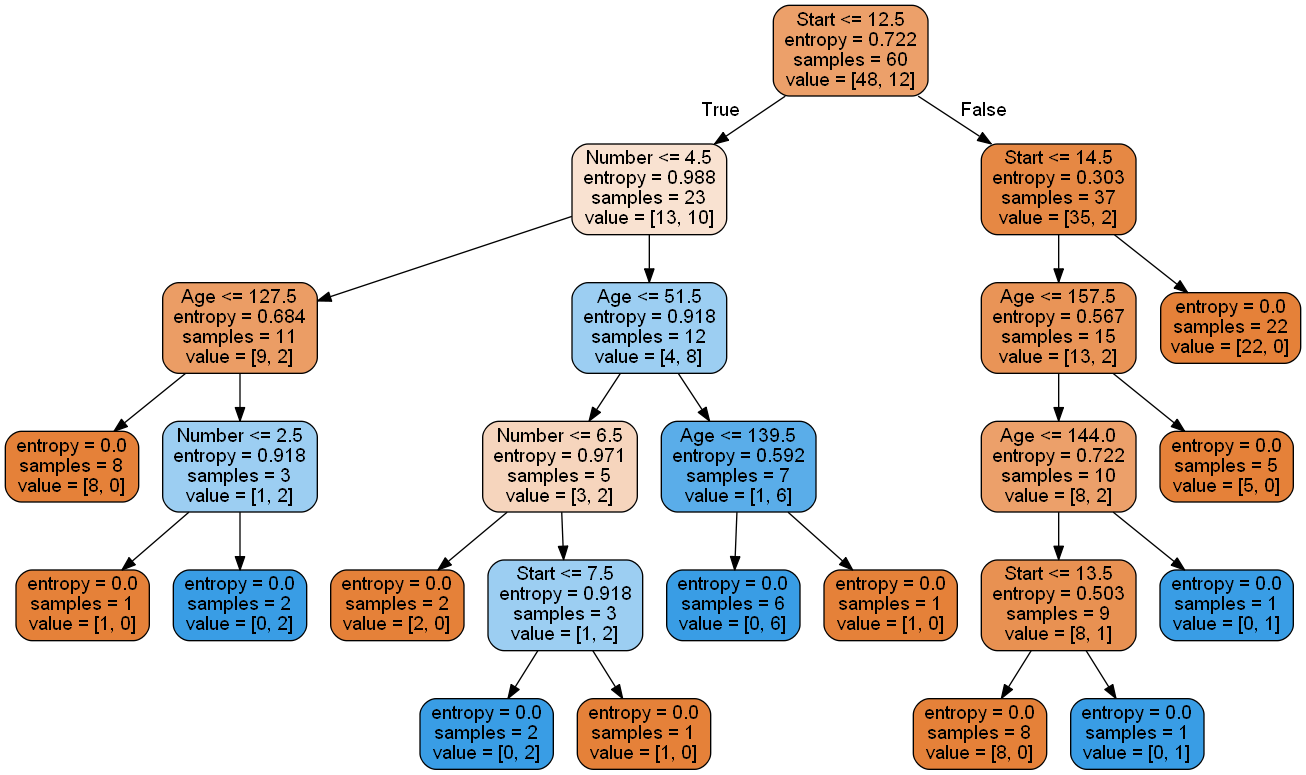

In [24]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())
